# Scanning EXRAD Reflectivity Plots

This code takes scanning data from the EXRAD and plots horizontal cross sections of reflectivity.  Cross track plots are created in the vertical and horizontal. 

In [221]:
import netCDF4
from netCDF4 import Dataset

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import numpy as np

import pandas as pd

import cartopy.crs as ccrs
import cartopy.feature as cfeature

import datetime
from datetime import datetime, timedelta

import pyart

%config InlineBackend.figure_format='retina'
plt.rcParams["font.family"] = "Arial"

In [222]:
data = Dataset('/Volumes/IMPACTS/IMPACTS_EXRAD-Scan_L1B_RevA_20200225T223001_to_20200225T224815.h5')


xdist = data['Gridded']['Data']['Xdist'][:][:, 0]
ydist = data['Gridded']['Data']['Ydist'][:][:, 0]
zdist = data['Gridded']['Data']['Zdist'][:][:, 0]
dbz = data['Gridded']['Data']['dBZe'][:]

lat = data['Gridded']['Navigation']['Data']['Latitude'][:][:, 0]
lon = data['Gridded']['Navigation']['Data']['Longitude'][:][:, 0]

time = data['Gridded']['Time']['Data']['TimeUTC'][:, 0]
time = netCDF4.num2date(time,units = 'seconds since 1970-01-01 00:00:00 +00:00')

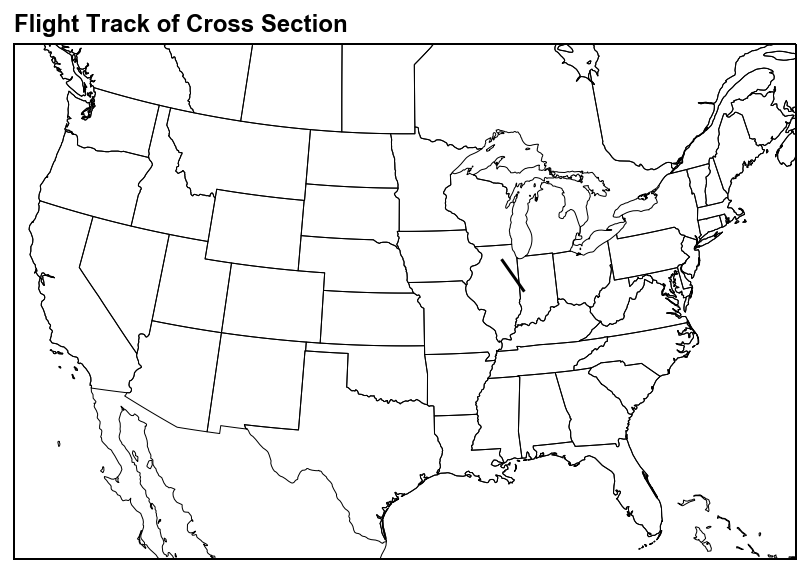

In [223]:
df_flight = pd.DataFrame()
df_flight['Lat'] = lat
df_flight['Lon'] = lon
df_flight.index = time



fig = plt.figure(figsize=(7, 5))

proj = ccrs.LambertConformal()
ax = fig.add_subplot(1, 1, 1, projection=proj)

extent = [-120, -72, 25, 52]
ax.set_extent(extent, crs=ccrs.PlateCarree())

ax.coastlines(resolution='50m', color='black', linewidth=0.5, zorder = 11)
states_provinces = cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lakes', scale='50m', facecolor='none', zorder = 11)
ax.add_feature(states_provinces, edgecolor='black', linewidth=0.5)

plt.title('Flight Track of Cross Section', loc='left', fontweight='bold')

ax.plot(df_flight.Lon, df_flight.Lat, transform = ccrs.PlateCarree(), zorder = 10, color = 'black')

plt.show()

In [224]:
time_wanted = '2020-02-25 22:45:15'

d1 = datetime.strptime(time_wanted,"%Y-%m-%d %H:%M:%S")

time_difference = []
for i in range(len(time)):
    time_difference.append(abs(time[i] - (d1)))
    
index_cross_wanted = np.argmin(time_difference)

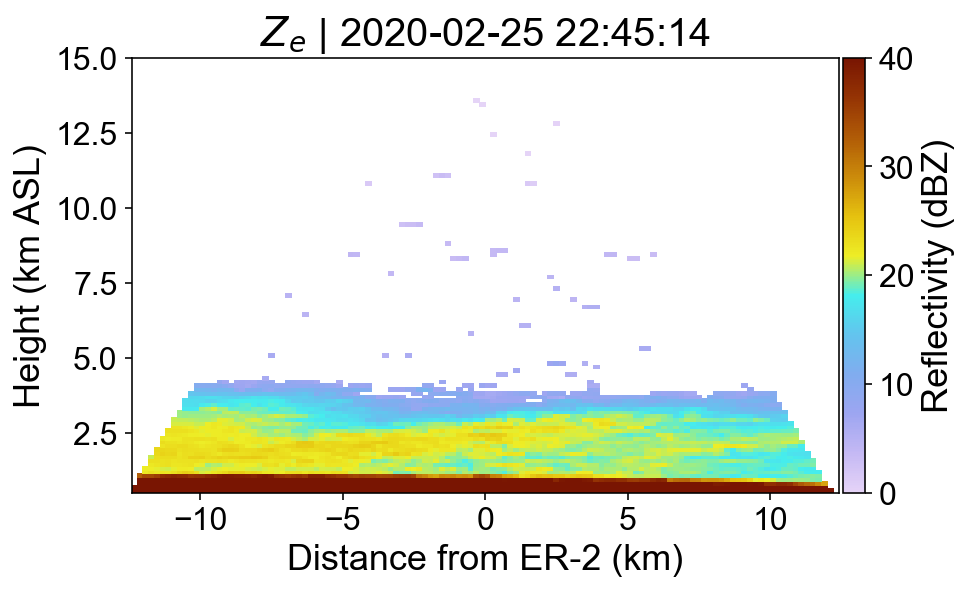

In [225]:
fig, ax = plt.subplots(figsize = (7.5, 4))

cb = ax.pcolormesh(xdist/1000, zdist/1000, dbz[:, index_cross_wanted, :], vmin = 0, vmax = 40, cmap = pyart.graph.cm.LangRainbow12) #This is subsetting time
cbar = plt.colorbar(cb, pad = 0.005)
cbar.ax.tick_params(labelsize=16) 
cbar.set_label('Reflectivity (dBZ)', fontsize = 18)

ax.tick_params(which='both',labelsize=16)

ax.set_xlabel('Distance from ER-2 (km)', fontsize = 18)
ax.set_ylabel('Height (km ASL)', fontsize = 18)

ax.set_title('$Z_e$ | ' + str(time[index_cross_wanted])[:19], fontsize = 20)
plt.show()

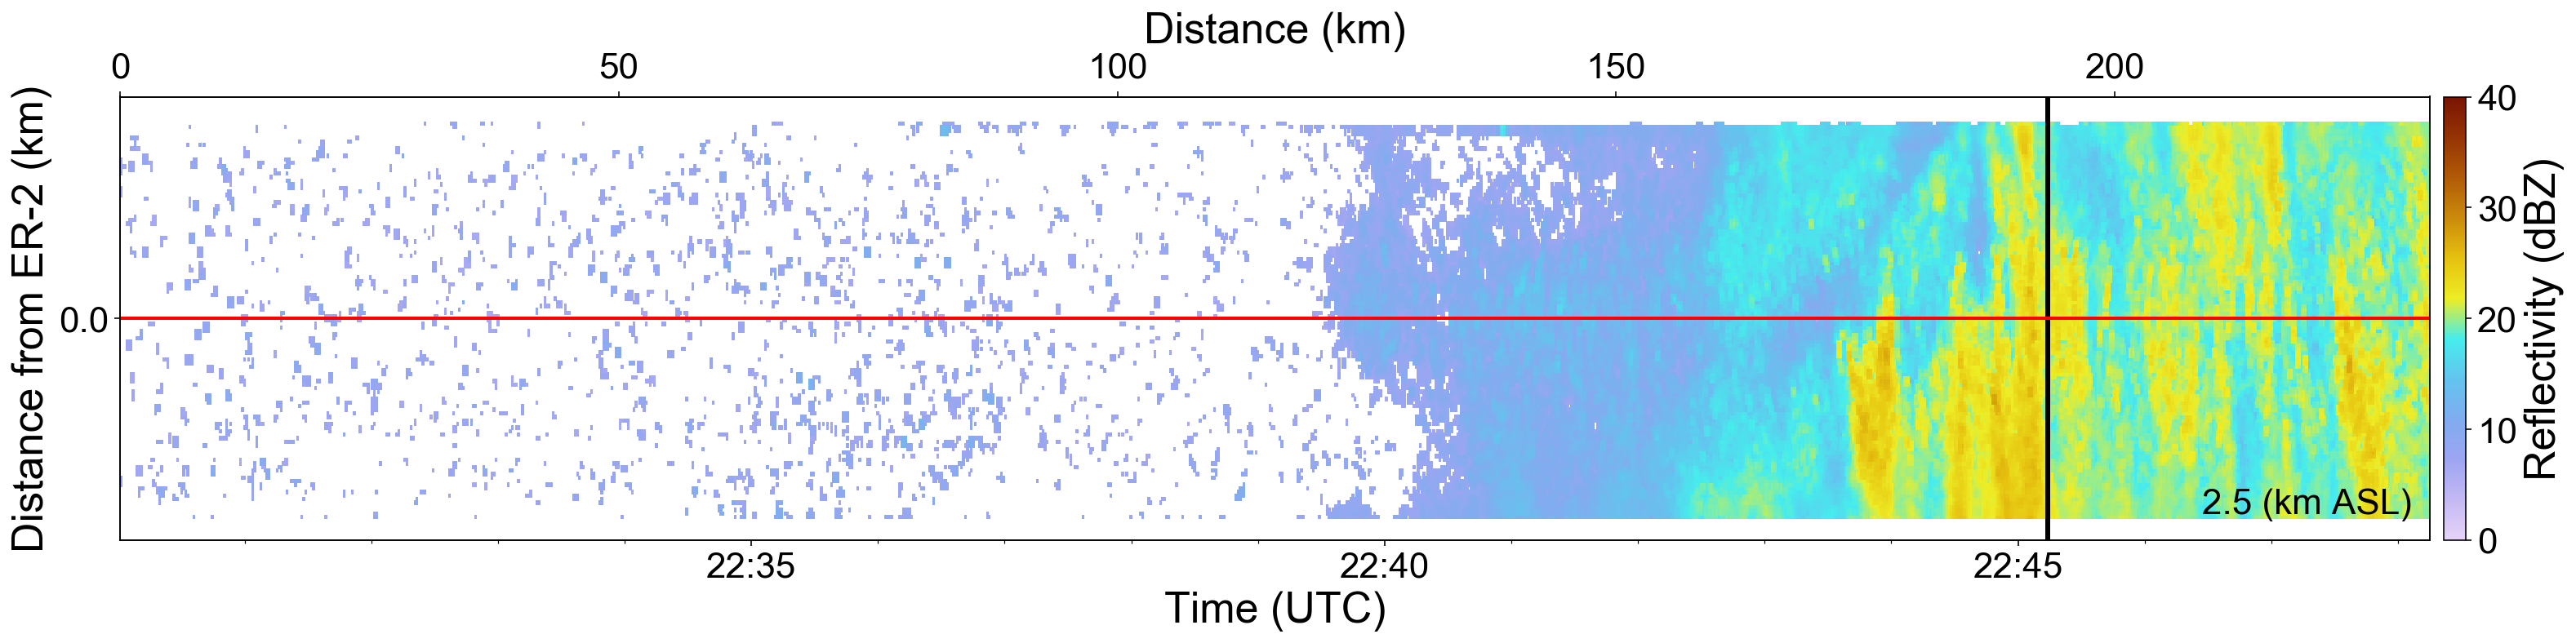

In [226]:
height_wanted = 2500 #Interval of 125 m from 500 m to 15000 m 
height_wanted_idx = np.where(zdist == height_wanted)[0][0]

#Vertical Cross Section (Next Cell)
idx_horizontal_distance_from_aircraft = np.where(xdist == 0)[0][0]

#Black line is location of cross section created above
#Red line is location of cross section created below

fig, ax = plt.subplots(figsize = (30, 5))
cb = ax.pcolormesh(time, xdist/1000, dbz[height_wanted_idx, :, :].T, snap = True, clip_on = True, vmin = 0, vmax = 40, cmap = pyart.graph.cm.LangRainbow12)
cbar = plt.colorbar(cb, pad = 0.005)
cbar.ax.tick_params(labelsize=22) 
cbar.set_label('Reflectivity (dBZ)', fontsize = 26)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

xlocator = mdates.MinuteLocator(interval = 1)
ax.xaxis.set_minor_locator(xlocator)

xlocator = mdates.MinuteLocator(np.arange(0, 60, 5))
ax.xaxis.set_major_locator(xlocator)

ax2 = ax.twiny()
ax2.set_xlim(ydist[0], ydist[-1]/1000)
ax2.tick_params(which='both',labelsize=22)


ax2.set_title('Distance (km)', fontsize = 26)

ax.set_xlabel('Time (UTC)', fontsize = 26)
ax.set_ylabel('Distance from ER-2 (km)', fontsize = 26)

ax.tick_params(labelsize = 22)

txt = str(height_wanted/1000) + ' (km ASL)'
plt.figtext(.745, 0.17, txt, wrap=True, horizontalalignment='center', fontsize=22)

ax.axvline(str(time[index_cross_wanted])[:19], color = 'black', linewidth = 3)
ax.axhline(str(xdist[idx_horizontal_distance_from_aircraft])[:19], color = 'red', linewidth = 2)


plt.show()

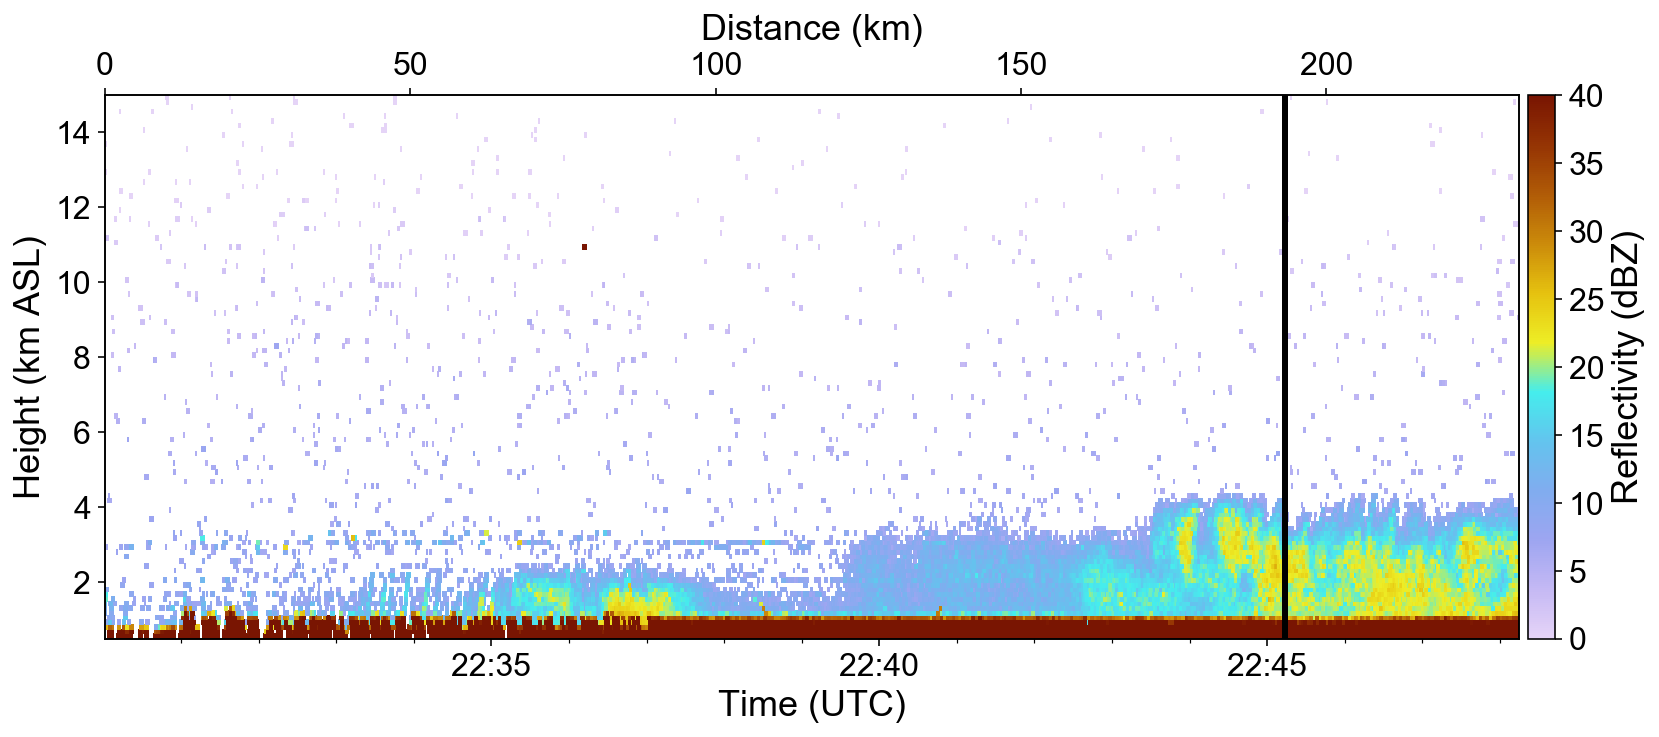

In [227]:
fig, ax = plt.subplots(figsize = (15, 5))

cb = ax.pcolormesh(time, zdist/1000, dbz[:, :, idx_horizontal_distance_from_aircraft], vmin = 0, vmax = 40, cmap = pyart.graph.cm.LangRainbow12)
cbar = plt.colorbar(cb, pad = 0.005)
cbar.ax.tick_params(labelsize=16) 
cbar.set_label('Reflectivity (dBZ)', fontsize = 18)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

xlocator = mdates.MinuteLocator(interval = 1)
ax.xaxis.set_minor_locator(xlocator)

xlocator = mdates.MinuteLocator(np.arange(0, 60, 5))
ax.xaxis.set_major_locator(xlocator)

ax2 = ax.twiny()
ax2.set_xlim(ydist[0], ydist[-1]/1000)
ax2.tick_params(which='both',labelsize=16)

ax2.set_title('Distance (km)', fontsize = 18)

ax.set_xlabel('Time (UTC)', fontsize = 18)
ax.set_ylabel('Height (km ASL)', fontsize = 18)

ax.tick_params(labelsize = 16)

ax.axvline(str(time[index_cross_wanted])[:19], color = 'black', linewidth = 3)

plt.show()